# Discretization


In [2]:
import pandas as pd
import numpy as np


In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [5]:
df =pd.read_csv('dataset\\train.csv ',usecols=['Age','Fare','Survived'])

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(714, 3)

In [8]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
X =df.iloc[:,1:3]
Y =df.iloc[:,0:1]

In [10]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [11]:
X_train ,X_test,Y_train ,Y_test = train_test_split(X,Y,test_size= .2,random_state=42)

In [12]:
clf =DecisionTreeClassifier()
clf.fit(X_train,Y_train)

y_pred =clf.predict(X_test)

print("accuracy_score",accuracy_score(Y_test,y_pred))


accuracy_score 0.6363636363636364


In [13]:
print("Cross Validation Score",np.mean(cross_val_score(clf,X,Y,scoring='accuracy')))

Cross Validation Score 0.6218556091795528


In [14]:
Kbin_age =KBinsDiscretizer(n_bins=5,encode ='ordinal',strategy='quantile')
Kbin_fare =KBinsDiscretizer(n_bins=5,encode ='ordinal',strategy='quantile')

In [15]:
trf =ColumnTransformer(transformers=[('first',Kbin_age,[0]),
                                     ('second',Kbin_fare,[1])],remainder='passthrough')

In [16]:
X_train_trf =trf.fit_transform(X_train)
X_test_trf =trf.transform(X_test)

In [19]:
trf.named_transformers_['first'].n_bins_



array([5])

In [20]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.8958,  13.    ,  26.    ,  51.4792, 512.3292])],
      dtype=object)

In [21]:
output =pd.DataFrame({'age':X_train['Age'],'age_trf':X_train_trf[:,0]
                      ,'fare ':X_train['Fare'],'fare_trf':X_train_trf[:,1]})

In [24]:
output['age_labels'] =pd.cut(x=X_train['Age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist()) # cut = divides into bins 
output['fare_labels'] =pd.cut(x=X_train['Fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [25]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
266,16.00,0.0,39.6875,3.0,"(0.42, 19.0]","(26.0, 51.479]"
344,36.00,3.0,13.0000,2.0,"(32.0, 42.0]","(7.896, 13.0]"
796,49.00,4.0,25.9292,2.0,"(42.0, 80.0]","(13.0, 26.0]"
673,31.00,2.0,13.0000,2.0,"(25.0, 32.0]","(7.896, 13.0]"
305,0.92,0.0,151.5500,4.0,"(0.42, 19.0]","(51.479, 512.329]"


In [27]:
clf =DecisionTreeClassifier()

clf.fit(X_train_trf,Y_train)
y_pre2=clf.predict(X_test_trf)

accuracy_score(Y_test,y_pre2)

0.6433566433566433

In [28]:
X_trf =trf.fit_transform(X)

np.mean(cross_val_score(clf,X,Y,scoring='accuracy'))



0.6330444203683641

In [37]:
def discretize(bins,strategy):
    KBin_age =KBinsDiscretizer(n_bins=bins ,encode='ordinal',strategy=strategy)
    KBin_fare =KBinsDiscretizer(n_bins=bins ,encode='ordinal',strategy=strategy)
    
    trf=ColumnTransformer(transformers=[('first',KBin_age,[0]),('second',KBin_fare,[1])],remainder='passthrough')
    
    X_trf =trf.fit_transform(X)
    print('cross_val_score',np.mean(cross_val_score(DecisionTreeClassifier(),X,Y,scoring ='accuracy')))
    
    X_train_trf =trf.fit_transform(X_train)
    X_test_trf =trf.transform(X_test)
    clf =DecisionTreeClassifier()
    clf.fit(X_train_trf,Y_train)
    y_predict=clf.predict(X_test_trf)
    
    print("accuracy_score",accuracy_score(Y_test,y_predict))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before Binnig")
    
    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title('After Binning')
    
    plt.show()
    
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before Binnig")
    
    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title('After Binning')
    
    plt.show()
    
    

# Equal Frequency/Quantile

cross_val_score 0.6274401654683345
accuracy_score 0.6433566433566433


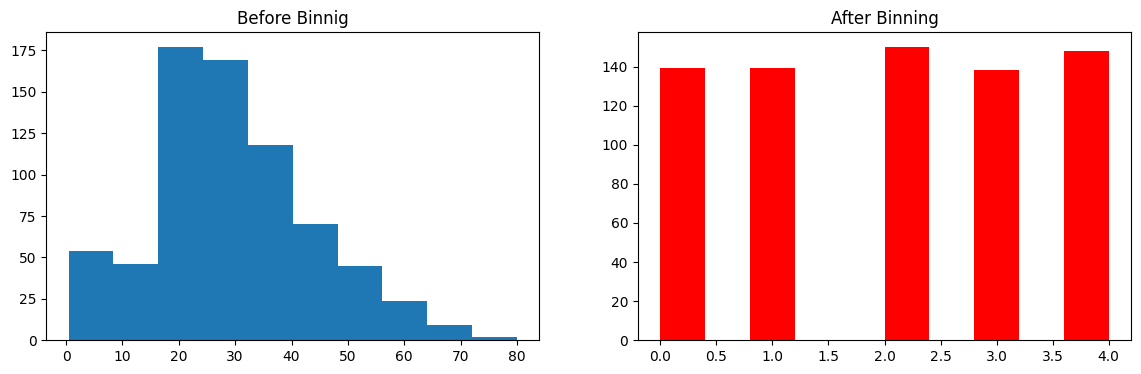

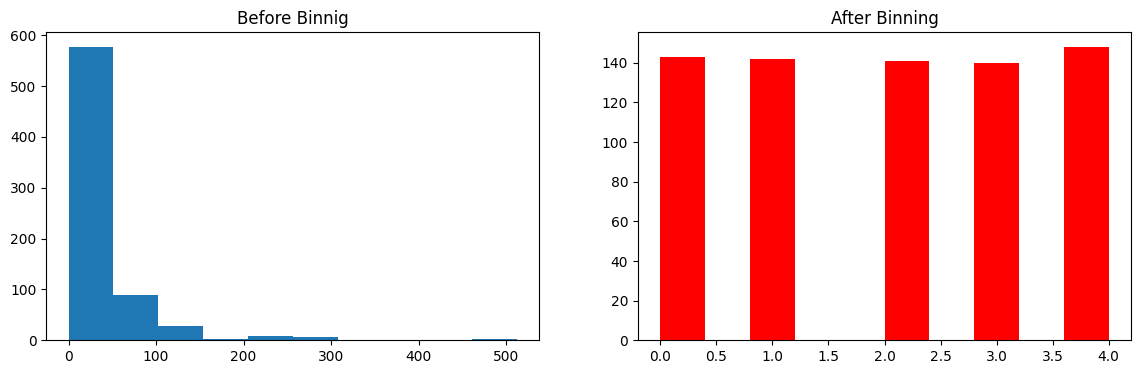

In [40]:
discretize(5,'quantile')

# Equal Width/ Uniform

cross_val_score 0.6288486161725599
accuracy_score 0.6783216783216783


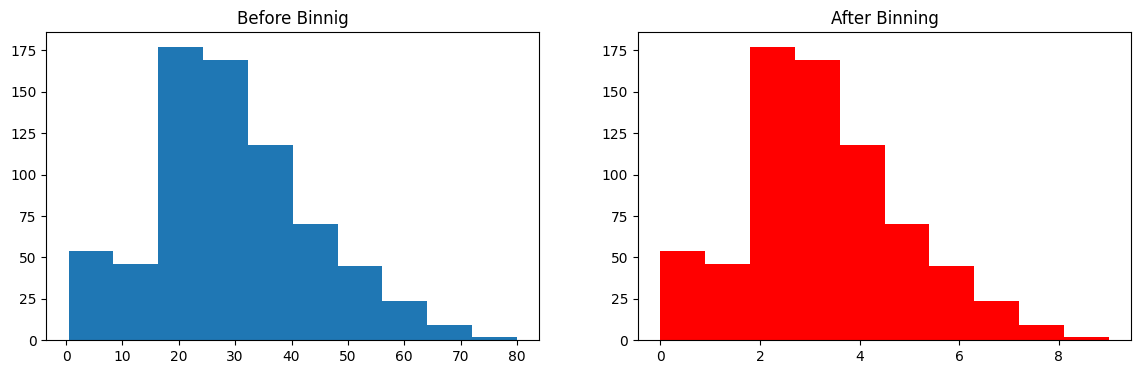

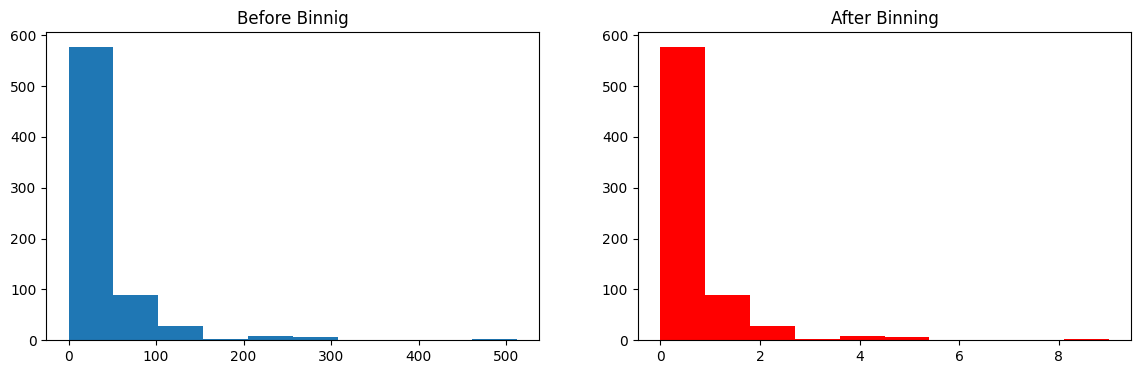

In [43]:
discretize(10,'uniform')

# Kmeans Binning

cross_val_score 0.6162612035851472
accuracy_score 0.6153846153846154


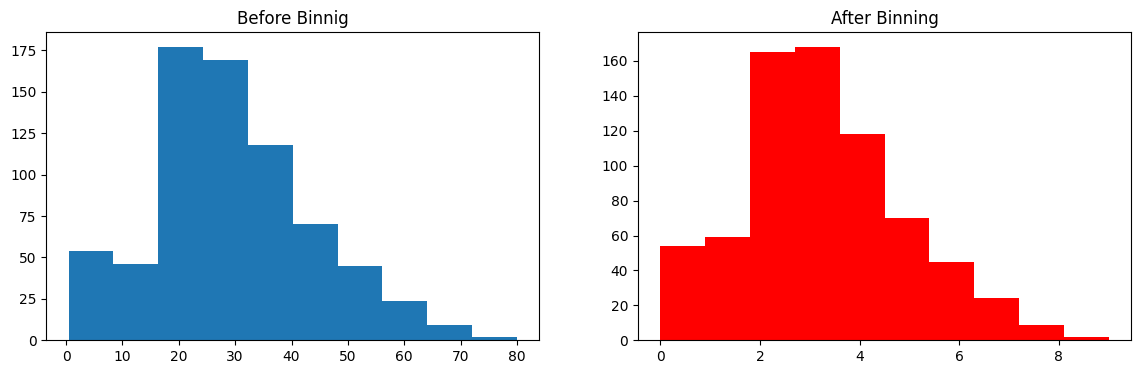

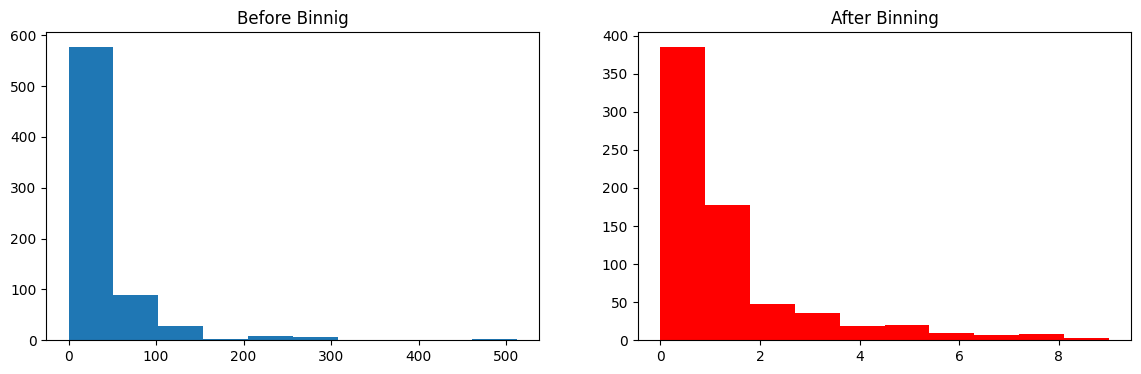

In [46]:
discretize(10,'kmeans')

# BINARIZATION

In [48]:
bf =pd.read_csv('dataset\\train.csv ',usecols=['Age','Fare','SibSp','Parch','Survived'])
bf.dropna(inplace=True)

In [50]:
bf.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [96]:
bf['family'] = bf['SibSp'] + bf['Parch']
cf =bf['family']

In [97]:
cf =bf.drop(columns =['SibSp','Parch'])


In [99]:
A =cf.drop(columns=['Survived'])
B =cf['Survived']

In [100]:
A.head()

,Age,Fare,family
0,22.0,7.2500,1
1,38.0,71.2833,1
2,26.0,7.9250,0
3,35.0,53.1000,1
4,35.0,8.0500,0


In [101]:
A_train ,A_test ,B_train,B_test = train_test_split(A,B,test_size=0.2,random_state=42)

In [102]:
A_train.head()

,Age,Fare,family
328,31.0,20.5250,2
73,26.0,14.4542,1
253,30.0,16.1000,1
719,33.0,7.7750,0
666,25.0,13.0000,0


In [103]:
B_train.shape

(571,)

In [104]:
# without Binarization
clf =DecisionTreeClassifier()
clf.fit(A_train,B_train)
b_pred =clf.predict(A_test)

print("accuracy_score",accuracy_score(B_test,b_pred))

accuracy_score 0.6223776223776224


In [105]:
# applying Binarization
from sklearn.preprocessing import Binarizer


In [106]:
trf1 =ColumnTransformer(transformers=[('bin',Binarizer(copy=False),['family'])],remainder='passthrough')

In [107]:
# to know the passenger is traveling with family or alone that in family column

A_train_trf1 = trf1.fit_transform(A_train)
A_test_trf1 =trf1.transform(A_test)

In [108]:
pd.DataFrame(A_train_trf1 ,columns=['family','Age','Fare'])

,family,Age,Fare
0,1.0,31.0,20.5250
1,1.0,26.0,14.4542
2,1.0,30.0,16.1000
3,0.0,33.0,7.7750
4,0.0,25.0,13.0000
...,...,...,...
566,1.0,46.0,61.1750
567,0.0,25.0,13.0000
568,0.0,41.0,134.5000
569,1.0,33.0,20.5250
